In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/feaers-report-id/tournament_awards_records.csv
/kaggle/input/feaers-report-id/points_table.csv
/kaggle/input/feaers-report-id/match_results.csv
/kaggle/input/feaers-report-id/venue_statistics.csv
/kaggle/input/feaers-report-id/team_statistics.csv
/kaggle/input/feaers-report-id/top_run_scorers.csv
/kaggle/input/feaers-report-id/top_wicket_takers.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv("/kaggle/input/feaers-report-id/top_run_scorers.csv")

In [4]:
df

,rank,player_name,team,matches,innings,runs,highest_score,average,strike_rate,centuries,half_centuries
0,1,Laura Wolvaardt,South Africa,10,10,571,169,63.44,85.78,3,2
1,2,Smriti Mandhana,India,10,10,379,105,42.11,87.12,1,3
2,3,Jemimah Rodrigues,India,10,9,292,102*,48.67,79.78,1,2
3,4,Phoebe Litchfield,Australia,10,10,287,103,31.89,92.58,1,1
4,5,Ashleigh Gardner,Australia,10,9,275,96*,39.29,102.23,0,2
5,6,Deepti Sharma,India,10,9,215,58,30.71,81.44,0,2
6,7,Beth Mooney,Australia,10,9,213,85*,35.50,75.53,0,2
7,8,Ellyse Perry,Australia,10,9,206,78,29.43,71.28,0,1
8,9,Tahlia McGrath,Australia,10,9,198,87,28.29,88.00,0,1
9,10,Heather Knight,England,9,9,195,70,24.38,72.49,0,2


In [5]:
df.head()

,rank,player_name,team,matches,innings,runs,highest_score,average,strike_rate,centuries,half_centuries
0,1,Laura Wolvaardt,South Africa,10,10,571,169,63.44,85.78,3,2
1,2,Smriti Mandhana,India,10,10,379,105,42.11,87.12,1,3
2,3,Jemimah Rodrigues,India,10,9,292,102*,48.67,79.78,1,2
3,4,Phoebe Litchfield,Australia,10,10,287,103,31.89,92.58,1,1
4,5,Ashleigh Gardner,Australia,10,9,275,96*,39.29,102.23,0,2


In [6]:
df.tail()

,rank,player_name,team,matches,innings,runs,highest_score,average,strike_rate,centuries,half_centuries
10,11,Harmanpreet Kaur,India,10,10,188,95,20.89,80.34,0,1
11,12,Annerie Dercksen,South Africa,10,8,182,84*,30.33,112.35,0,1
12,13,Marizanne Kapp,South Africa,10,9,179,74,22.38,68.85,0,1
13,14,Nat Sciver-Brunt,England,9,9,176,67,21.50,74.58,0,1
14,15,Sophie Devine,New Zealand,8,8,174,65,21.75,79.45,0,2


In [7]:
df.describe()

,rank,matches,innings,runs,average,strike_rate,centuries,half_centuries
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,8.000000,9.733333,9.133333,248.666667,32.704000,83.453333,0.400000,1.600000
std,4.472136,0.593617,0.639940,106.379823,11.773827,11.882852,0.828079,0.632456
min,1.000000,8.000000,8.000000,174.000000,20.890000,68.850000,0.000000,1.000000
25%,4.500000,10.000000,9.000000,185.000000,23.380000,75.055000,0.000000,1.000000
50%,8.000000,10.000000,9.000000,206.000000,30.330000,80.340000,0.000000,2.000000
75%,11.500000,10.000000,9.500000,281.000000,37.395000,87.560000,0.500000,2.000000
max,15.000000,10.000000,10.000000,571.000000,63.440000,112.350000,3.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            15 non-null     int64  
 1   player_name     15 non-null     object 
 2   team            15 non-null     object 
 3   matches         15 non-null     int64  
 4   innings         15 non-null     int64  
 5   runs            15 non-null     int64  
 6   highest_score   15 non-null     object 
 7   average         15 non-null     float64
 8   strike_rate     15 non-null     float64
 9   centuries       15 non-null     int64  
 10  half_centuries  15 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 1.4+ KB


Text(0.5, 1.0, 'Women World Cup Match and Runs')

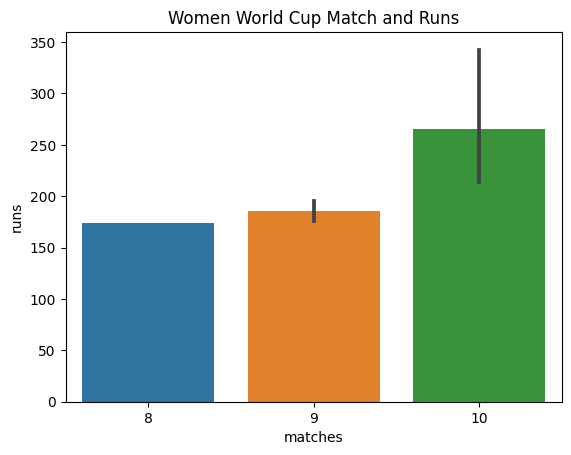

In [9]:
sns.barplot(x="matches", y="runs", data= df)
plt.title("Women World Cup Match and Runs")


<Figure size 2000x1600 with 0 Axes>

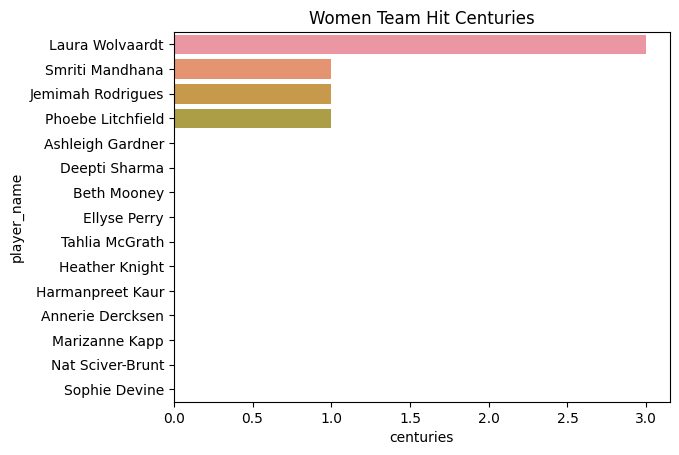

<Figure size 2000x1600 with 0 Axes>

In [10]:
sns.barplot(x="centuries", y ="player_name", data=df)
plt.title("Women Team Hit Centuries")
plt.figure(figsize=(20, 16))

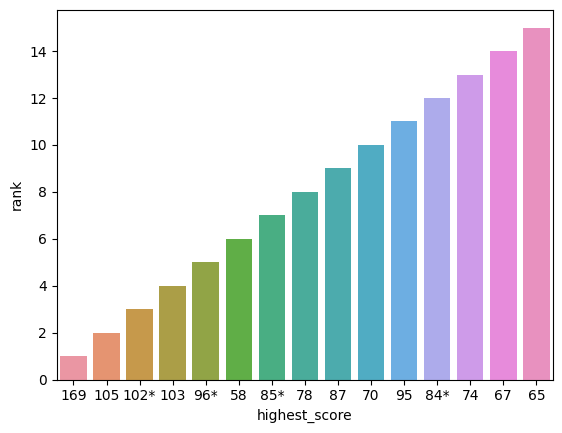

<Figure size 1000x600 with 0 Axes>

In [11]:
sns.barplot(x="highest_score", y="rank",data = df)
plt.figure(figsize=(10,6))
plt.show()